In [31]:
#IMPLEMENTACAO DO MINI-BATCH

#IMPORTAR BIBLIOTECAS
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#GERAR DADOS
M = 1000

x1 = np.random.randn(M,1)
x2 = np.random.randn(M,1)
w = np.random.randn(M,1)

y = 2*x1 + 2*x2 + w

#GERANDO VALORES PARA PARAMETROS
N = 200
a1 = np.linspace(-10.0, 14.0, N) #gerando N valores entre -10 e 14 regularmente espaçados
a2 = np.linspace(-10.0, 14.0, N) #gerando N valores entre -10 e 14 regularmente espaçados

A1, A2 = np.meshgrid(a1, a2) #criando o meshgrid

#GERANDO DADOS PARA PLOTAR A FUNÇÃO DE CUSTO
J = np.zeros ((N,N)) #Matriz N por N de zeros
for iter1 in range (0,N):
    for iter2 in range (0,N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum (np.square(y - yhat))
        
#CONCATENAR x1 E x2
X = np.c_[x1,x2]

#PASSO DE APRENDIZAGEM
#eta = 0.05 muito pequeno
#eta = 0.1 pequeno
#eta = 0.5 demorou muito
#eta = 0.3 ficou razoavel (ainda tenho dúvida nisso)
eta = 0.3

#NÚMERO DE ÉPOCAS E TAMANHO DO MINI-BATCH
N_epochs = 1
M_B = 75

#INICIALIZAÇÃO DOS PARÂMETROS
a = np.zeros((2,1)) #vetor coluna de parâmetros inicializados com 0
a[0] = np.random.randn(1,1) 
a[1] = np.random.randn(1,1) 

#CRIANDO DADOS HISTÓRICOS
a_hist = np.zeros((2,M + 1))
J_hist = np.zeros(M + 1)
a_hist[0,0] = a[0]
a_hist[1,0] = a[1]

#GD EM MINI-BATCH
for epoch in range(N_epochs):
    for i in range(M):
        random_indexes = random.sample(range(0,M), M_B) #gerando aleatoreamente os conjuntos para iteração
        xi = X[random_indexes]
        yi = y[random_indexes]
        gradients = (-2/M_B)*xi.T.dot(yi-xi.dot(a))
        a = a - eta * gradients
        y_hip = a[0]*x1 + a[1]*x2
        J_hist[i+1] = (1/M)*np.sum (np.square(y - y_hip))
        a_hist[0, i +1] = a[0]
        a_hist[1, i +1] = a[1]
        
# Print found values.
print('a1_mini-batch: ' + str(a[0, 0]))
print('a2_mini-batch: ' + str(a[1, 0]))

a1_mini-batch: 2.00297636295528
a2_mini-batch: 1.8893489151512992


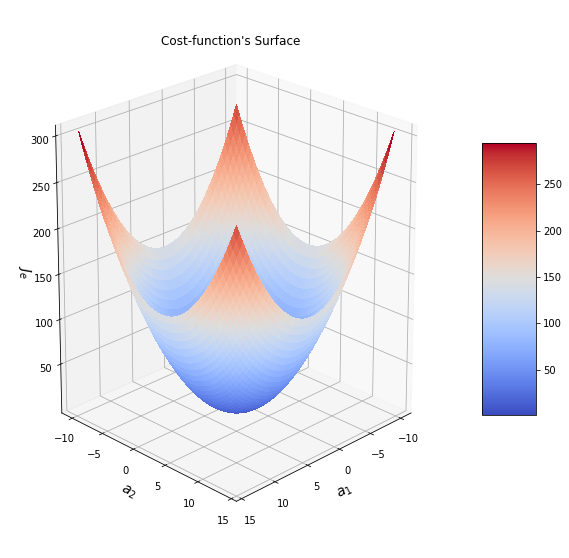

<Figure size 432x288 with 0 Axes>

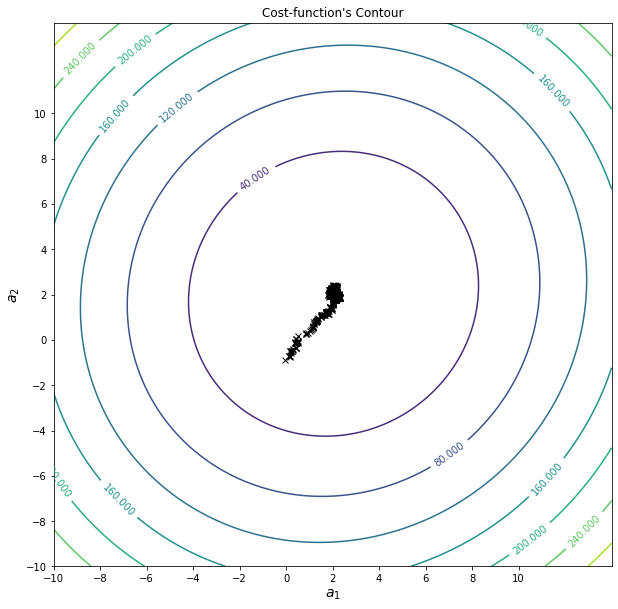

<Figure size 432x288 with 0 Axes>

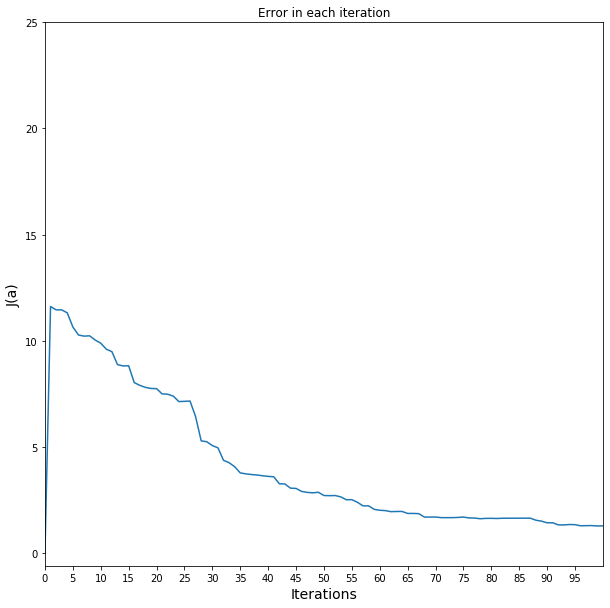

<Figure size 432x288 with 0 Axes>

In [50]:
#PLOTANDO GRAFICOS MINI-BATCH

#PLOTANDO O GRAFICO DA FUNÇÃO DE CUSTO
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# ADICIONANDO A BARRA DE CORES PARA LEGENDA
fig.colorbar(surf, shrink=0.5, aspect=5)

#ADICIONANDO LABELS E TÍTULO
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
fig

#MOSTRAR A FIGURA
plt.show()

#SALVAR
plt.savefig("superficie_erro_gd_minibatch_exercicio5.png", dpi=600)

#PLOTAR CURVA DE NÍVEL
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1, A2, J)

#ADICIONANDO LABELS E TÍTULO
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')

#ADICIONANDO MARCADORES DE PARÂMETROS
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')

#ARRUMANDO OS INTERVALOS
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))

#MOSTRAR FIGURA
plt.show()

#SALVAR
plt.savefig("grafico_contorno_gd_minibatch_exercicio5.png", dpi=600)

#PLOTANDO O GRAFICO DO ERRO PARA CADA ITERAÇÃO
it = np.linspace(0,1000,M+1)
plt.figure(figsize=(10,10))
plt.plot(it, J_hist)

#ADICIONANDO LABELS E TÍTULO
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('J(a)', fontsize=14)
plt.title('Error in each iteration')

#ARRUMANDO OS INTERVALOS
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, step=5.0))
plt.yticks(np.arange(0, 30, step=5.0))

#MOSTRAR FIGURA
plt.show()

#SALVAR
plt.savefig("erro_iteracao_gd_minibatch_exercicio5.png", dpi=600)

In [33]:
#IMPLEMENTACAO DO BATELADA

#IMPORTAR BIBLIOTECAS
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#GERAR DADOS
M = 1000

x1 = np.random.randn(M,1)
x2 = np.random.randn(M,1)
w = np.random.randn(M,1)

y = 2*x1 + 2*x2 + w

#GERANDO VALORES PARA PARAMETROS
N = 200
a1 = np.linspace(-10.0, 14.0, N) #gerando N valores entre -10 e 14 regularmente espaçados
a2 = np.linspace(-10.0, 14.0, N) #gerando N valores entre -10 e 14 regularmente espaçados

A1, A2 = np.meshgrid(a1, a2) #criando o meshgrid

#GERANDO DADOS PARA PLOTAR A FUNÇÃO DE CUSTO
J = np.zeros ((N,N)) #Matriz N por N de zeros
for iter1 in range (0,N):
    for iter2 in range (0,N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum (np.square(y - yhat))
        
#CONCATENAR x1 E x2
X = np.c_[x1,x2]

#NÚMERO DE ITERAÇÕES
N_iterations = 1000

#PASSO DE APRENDIZAGEM
#eta = 0.05 muito pequeno
#eta = 0.1 pequeno
#eta = 0.5 demorou muito
#eta = 0.3 ficou razoavel (ainda tenho dúvida nisso)
eta = 0.3

#INICIALIZAÇÃO DOS PARÂMETROS
a = np.zeros((2,1)) #vetor coluna de parâmetros inicializados com 0
a[0] = np.random.randn(1,1) 
a[1] = np.random.randn(1,1) 

#CRIANDO DADOS HISTÓRICOS
a_hist = np.zeros((2,M + 1))
J_hist = np.zeros(M + 1)
a_hist[0,0] = a[0]
a_hist[1,0] = a[1]

#GD BATELADA
for iteration in range(N_iterations):
    gradients = (-2/M)*X.T.dot(y-X.dot(a))
    a = a - eta * gradients
    a_hist[0, iteration +1] = a[0]
    a_hist[1, iteration +1] = a[1]
    y_hip = a[0]*x1 + a[1]*x2
    J_hist[i+1] = (1/M)*np.sum (np.square(y - y_hip))
        
# Print found values.
print('a1_batelada: ' + str(a[0, 0]))
print('a2_batelada: ' + str(a[1, 0]))

a1_batelada: 2.0058153749019265
a2_batelada: 1.9930705644480806


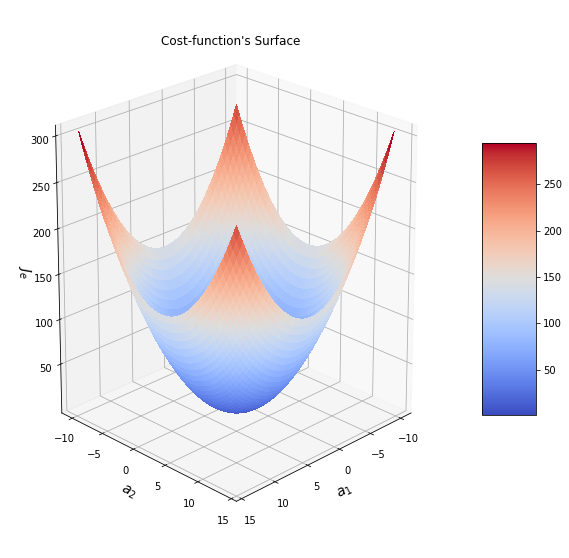

<Figure size 432x288 with 0 Axes>

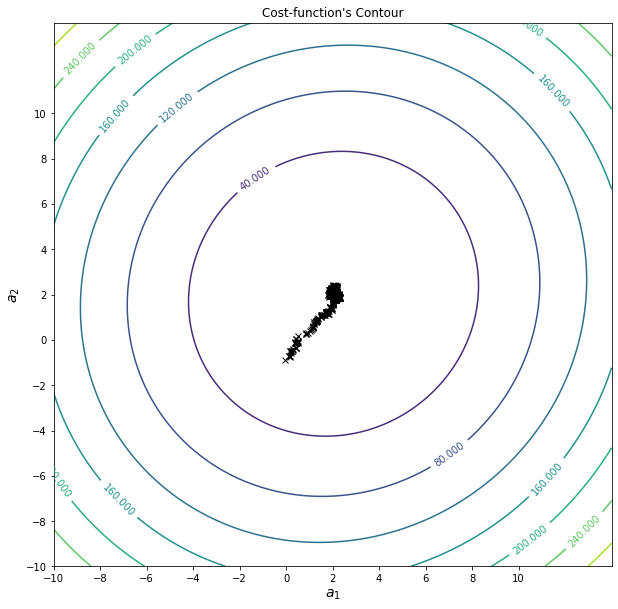

<Figure size 432x288 with 0 Axes>

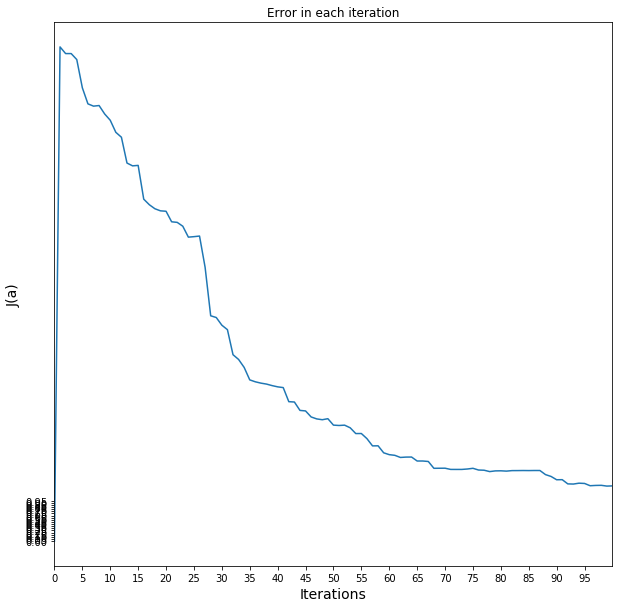

<Figure size 432x288 with 0 Axes>

In [51]:
#PLOTANDO GRAFICOS BATELADA

#PLOTANDO O GRAFICO DA FUNÇÃO DE CUSTO
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# ADICIONANDO A BARRA DE CORES PARA LEGENDA
fig.colorbar(surf, shrink=0.5, aspect=5)

#ADICIONANDO LABELS E TÍTULO
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
fig

#MOSTRAR A FIGURA
plt.show()

#SALVAR
plt.savefig("superficie_erro_gd_batelada_exercicio5.png", dpi=600)

#PLOTAR CURVA DE NÍVEL
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1, A2, J)

#ADICIONANDO LABELS E TÍTULO
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')

#ADICIONANDO MARCADORES DE PARÂMETROS
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')

#ARRUMANDO OS INTERVALOS
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))

#MOSTRAR FIGURA
plt.show()

#SALVAR
plt.savefig("grafico_contorno_gd_batelada_exercicio5.png", dpi=600)

#PLOTANDO O GRAFICO DO ERRO PARA CADA ITERAÇÃO
it = np.linspace(0,1000,M+1)
plt.figure(figsize=(10,10))
plt.plot(it, J_hist)

#ADICIONANDO LABELS E TÍTULO
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('J(a)', fontsize=14)
plt.title('Error in each iteration')

#ARRUMANDO OS INTERVALOS
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, step=5.0))
plt.yticks(np.arange(0, 1, step=0.05))

#MOSTRAR FIGURA
plt.show()

#SALVAR
plt.savefig("erro_iteracao_gd_batelada_exercicio5.png", dpi=600)

In [45]:
#IMPLEMENTACAO DO ESTOCASTICO

#IMPORTAR BIBLIOTECAS
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#GERAR DADOS
M = 1000

x1 = np.random.randn(M,1)
x2 = np.random.randn(M,1)
w = np.random.randn(M,1)

y = 2*x1 + 2*x2 + w

#GERANDO VALORES PARA PARAMETROS
N = 200
a1 = np.linspace(-10.0, 14.0, N) #gerando N valores entre -10 e 14 regularmente espaçados
a2 = np.linspace(-10.0, 14.0, N) #gerando N valores entre -10 e 14 regularmente espaçados

A1, A2 = np.meshgrid(a1, a2) #criando o meshgrid

#GERANDO DADOS PARA PLOTAR A FUNÇÃO DE CUSTO
J = np.zeros ((N,N)) #Matriz N por N de zeros
for iter1 in range (0,N):
    for iter2 in range (0,N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum (np.square(y - yhat))
        
#CONCATENAR x1 E x2
X = np.c_[x1,x2]

#PASSO DE APRENDIZAGEM
#eta = 0.3 absurdamente grande
#eta = 0.1 ainda muito grande
#eta = 0.05 não convergiu mas está razoável
#eta = 0.01 melhorou, mas não convergiu ainda
eta = 0.01

#NÚMERO DE ÉPOCAS
N_epochs = 1

#INICIALIZAÇÃO DOS PARÂMETROS
a = np.zeros((2,1)) #vetor coluna de parâmetros inicializados com 0
a[0] = np.random.randn(1,1) 
a[1] = np.random.randn(1,1) 

#CRIANDO DADOS HISTÓRICOS
a_hist = np.zeros((2,M + 1))
J_hist = np.zeros(M + 1)
a_hist[0,0] = a[0]
a_hist[1,0] = a[1]

#GD ESTOCÁSTICO
for epoch in range(N_epochs):
    for i in range(M):
        random_index = np.random.randint(M)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = -2*xi.T.dot(yi-xi.dot(a))
        a = a - eta * gradients
        a_hist[0, i +1] = a[0]
        a_hist[1, i +1] = a[1]
        y_hip = a[0]*x1 + a[1]*x2
        J_hist[i+1] = (1/M)*np.sum (np.square(y - y_hip))

        
# Print found values.
print('a1_mini-batch: ' + str(a[0, 0]))
print('a2_mini-batch: ' + str(a[1, 0]))

a1_mini-batch: 1.8979620745959085
a2_mini-batch: 2.0483455833431714


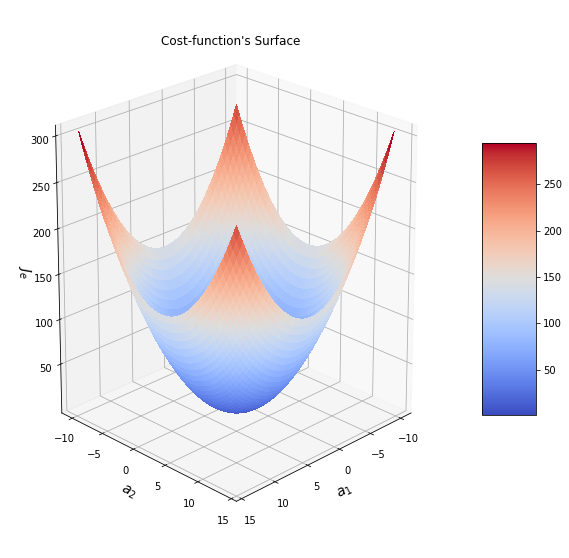

<Figure size 432x288 with 0 Axes>

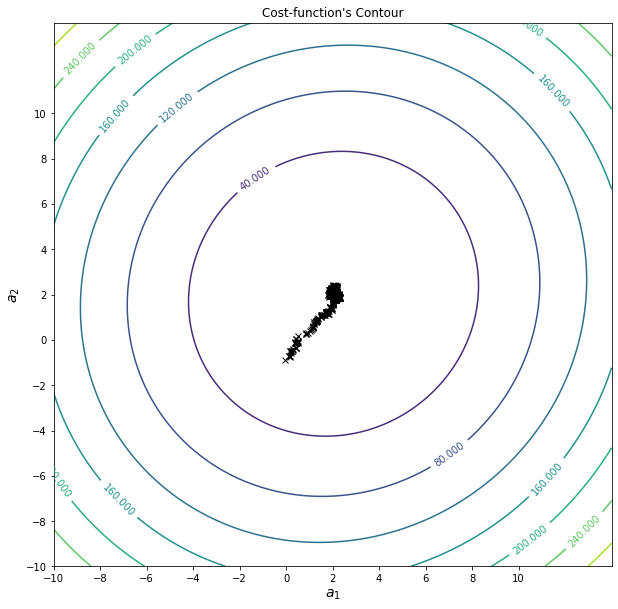

<Figure size 432x288 with 0 Axes>

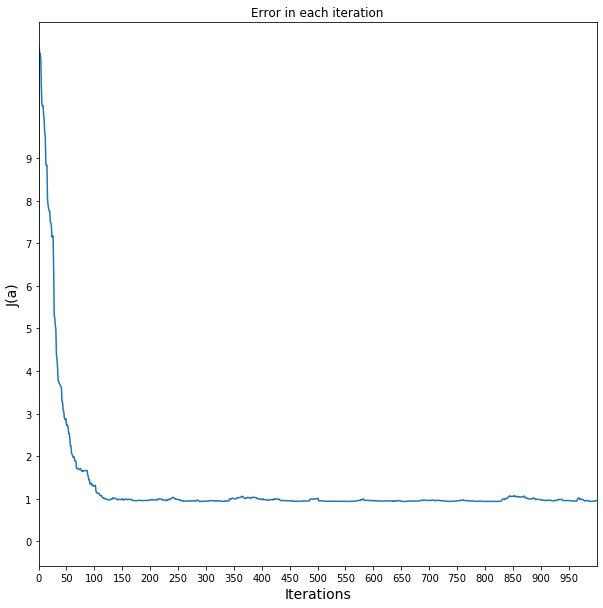

<Figure size 432x288 with 0 Axes>

In [52]:
#PLOTANDO GRAFICOS ESTOCASTICO

#PLOTANDO O GRAFICO DA FUNÇÃO DE CUSTO
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# ADICIONANDO A BARRA DE CORES PARA LEGENDA
fig.colorbar(surf, shrink=0.5, aspect=5)

#ADICIONANDO LABELS E TÍTULO
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
fig

#MOSTRAR A FIGURA
plt.show()

#SALVAR
plt.savefig("superficie_erro_gd_estocastico_exercicio5.png", dpi=600)

#PLOTAR CURVA DE NÍVEL
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1, A2, J)

#ADICIONANDO LABELS E TÍTULO
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')

#ADICIONANDO MARCADORES DE PARÂMETROS
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')

#ARRUMANDO OS INTERVALOS
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))

#MOSTRAR FIGURA
plt.show()

#SALVAR
plt.savefig("grafico_contorno_gd_estocastico_exercicio5.png", dpi=600)

#PLOTANDO O GRAFICO DO ERRO PARA CADA ITERAÇÃO
it = np.linspace(0,1000,M+1)
plt.figure(figsize=(10,10))
plt.plot(it, J_hist)

#ADICIONANDO LABELS E TÍTULO
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('J(a)', fontsize=14)
plt.title('Error in each iteration')

#ARRUMANDO OS INTERVALOS
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1000, step=50.0))
plt.yticks(np.arange(0, 10, step=1.0))

#MOSTRAR FIGURA
plt.show()

#SALVAR
plt.savefig("erro_iteracao_gd_estocastico_exercicio5.png", dpi=600)